In [3]:
import CactusTool

name = 'GW150914_28'
sim = CactusTool.load(name, '/Volumes/simulations/')
qlm = sim.ThornOutput('quasilocalmeasures').dsets
bbh = sim.ThornOutput('TwoPunctures')
trajectory = sim.ThornOutput('puncturetracker').dsets

In [5]:
import numpy as np
def get_BH_shape(mass, chi):
    """ Get an ellipsoid according Kerr-Schild horizon for a BH, with center
    at origin, and spin along z-direction.
    """

    a_Kerr = mass*np.linalg.norm(chi)
    rplus = mass + np.sqrt(mass**2 - a_Kerr**2)
    equitorial_rad = np.sqrt(rplus**2 + a_Kerr**2)
    polar_rad = rplus

    # ellipsoid at origin
    u, v = np.meshgrid(np.linspace(0,2*np.pi,30), \
        np.arccos(np.linspace(-1,1,15)))
    x = equitorial_rad*np.cos(u)*np.sin(v)
    y = equitorial_rad*np.sin(u)*np.sin(v)
    z = polar_rad*np.cos(v)

    return [x, y, z]

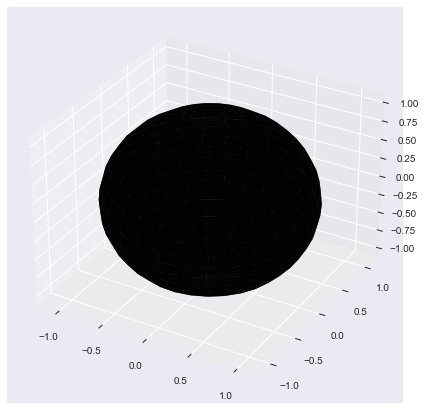

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d

plt.style.use('seaborn')
fig = plt.figure()
ax = axes3d.Axes3D(fig)

x, y, z = get_BH_shape(bbh.dsets['initial-bh-puncture-adm-mass1'], bbh.chi1)
ax.plot_surface(x, y, z, color='k', linewidth=0, alpha=0.9, \
        zorder=150)

In [9]:
def get_grids_on_planes(num_pts_1d, max_range):
    # generate grid
    x_1d = np.linspace(-max_range, max_range, num_pts_1d)
    y_1d = np.linspace(-max_range, max_range, num_pts_1d)
    z_1d = np.linspace(-max_range, max_range, num_pts_1d)

    [xZ, yZ] = np.meshgrid(x_1d, y_1d)
    [xY, zY] = np.meshgrid(x_1d, z_1d)
    [yX, zX] = np.meshgrid(y_1d, z_1d)

    xX = zZ = -max_range
    yY = max_range

    # Get Euclidean radii and th,ph
    rZ = np.sqrt(xZ**2 + yZ**2 + zZ**2)
    thZ = np.arccos(zZ/rZ)
    phZ = np.arctan2(yZ,xZ)

    rY = np.sqrt(xY**2 + yY**2 + zY**2)
    thY = np.arccos(zY/rY)
    phY = np.arctan2(yY,xY)

    rX = np.sqrt(xX**2 + yX**2 + zX**2)
    thX = np.arccos(zX/rX)
    phX = np.arctan2(yX,xX)

    return [rX, thX, phX], [yX, zX], \
           [rY, thY, phY], [xY, zY], \
           [rZ, thZ, phZ], [xZ, yZ]

In [10]:
sph_gridX, gridX, sph_gridY, gridY, sph_gridZ, gridZ = get_grids_on_planes(11, 10)

In [15]:
sph_gridX

[array([[17.32050808, 16.24807681, 15.3622915 , 14.69693846, 14.28285686,
         14.14213562, 14.28285686, 14.69693846, 15.3622915 , 16.24807681,
         17.32050808],
        [16.24807681, 15.09966887, 14.14213562, 13.41640786, 12.9614814 ,
         12.80624847, 12.9614814 , 13.41640786, 14.14213562, 15.09966887,
         16.24807681],
        [15.3622915 , 14.14213562, 13.11487705, 12.32882801, 11.83215957,
         11.66190379, 11.83215957, 12.32882801, 13.11487705, 14.14213562,
         15.3622915 ],
        [14.69693846, 13.41640786, 12.32882801, 11.48912529, 10.95445115,
         10.77032961, 10.95445115, 11.48912529, 12.32882801, 13.41640786,
         14.69693846],
        [14.28285686, 12.9614814 , 11.83215957, 10.95445115, 10.39230485,
         10.19803903, 10.39230485, 10.95445115, 11.83215957, 12.9614814 ,
         14.28285686],
        [14.14213562, 12.80624847, 11.66190379, 10.77032961, 10.19803903,
         10.        , 10.19803903, 10.77032961, 11.66190379, 12.8062484